In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) #normalisation
X = sc.fit_transform(X)
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1.0 , learning_rate=0.5)

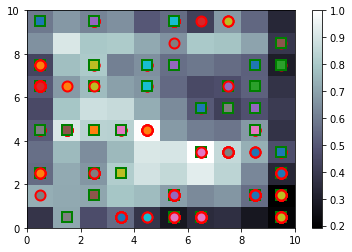

In [13]:
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)
#getting the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]], markeredgecolor = colors[y[i]],markerfacecolor=None, markersize=10,markeredgewidth=2)
show()    

In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)],mappings[(6,0)]),axis = 0 )

In [18]:
frauds = sc.inverse_transform(frauds)
len(frauds)

72

In [24]:
#Moving to supervised deep learning
customers = dataset.iloc[:,1:].values
#Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' #because my GPU sucks

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2,activation="relu",input_dim=15,kernel_initializer='uniform')) #input layers setup automatically based on our features. For choosing the hidden layer neuron, pick a number randomly
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid",kernel_initializer='uniform')) # adding second hidden layer
# ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid" )) #Output layer. Dense used to connect to the hidden layer. Sigmoid activation gives probability, hence used. 
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #choosing adam as it is the best optimizer. For loss, binary classification uses binary_crossentropy. for non-binary, use categorical_crossentropy
ann.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.9957
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 1.0000


In [29]:
y_pred = ann.predict(customers)
print(y_pred)

[[0.2186343 ]
 [0.15410179]
 [0.28163671]
 [0.04805726]
 [0.02657285]
 [0.01273546]
 [0.27334738]
 [0.00509286]
 [0.24139348]
 [0.01768428]
 [0.00496924]
 [0.00557464]
 [0.05286524]
 [0.00464901]
 [0.11241609]
 [0.11931914]
 [0.01253769]
 [0.021155  ]
 [0.28163671]
 [0.01198652]
 [0.191849  ]
 [0.14320505]
 [0.262855  ]
 [0.09481984]
 [0.21004921]
 [0.00592169]
 [0.28163671]
 [0.0212096 ]
 [0.01296204]
 [0.02041686]
 [0.01060405]
 [0.08659554]
 [0.0516308 ]
 [0.00874314]
 [0.07094404]
 [0.24167898]
 [0.03299755]
 [0.00990832]
 [0.00965887]
 [0.00399506]
 [0.02409849]
 [0.2806043 ]
 [0.01235589]
 [0.02560407]
 [0.19377661]
 [0.01028839]
 [0.19724703]
 [0.12367415]
 [0.11479107]
 [0.00981686]
 [0.2207821 ]
 [0.22055736]
 [0.28163671]
 [0.2418856 ]
 [0.08204243]
 [0.01548308]
 [0.01814774]
 [0.15194568]
 [0.04560119]
 [0.01185775]
 [0.19303563]
 [0.08173919]
 [0.0401668 ]
 [0.1544362 ]
 [0.01353282]
 [0.00441232]
 [0.1129117 ]
 [0.09797108]
 [0.22232342]
 [0.00598478]
 [0.18719825]
 [0.05

In [32]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred),axis=1)

In [33]:
y_pred

array([[1.57761560e+07, 1.57761560e+07, 2.18634307e-01],
       [1.57395480e+07, 1.57395480e+07, 1.54101789e-01],
       [1.56628540e+07, 1.56628540e+07, 2.81636715e-01],
       ...,
       [1.56754500e+07, 1.56754500e+07, 3.64309549e-02],
       [1.57764940e+07, 1.57764940e+07, 4.08615964e-03],
       [1.55924120e+07, 1.55924120e+07, 3.89715433e-02]])

In [34]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [35]:
y_pred

array([[1.55657140e+07, 1.55657140e+07, 1.92525297e-01],
       [1.55659960e+07, 1.55659960e+07, 1.78022951e-01],
       [1.55664950e+07, 1.55664950e+07, 3.54647636e-03],
       ...,
       [1.58150950e+07, 1.58150950e+07, 1.03122592e-02],
       [1.58152710e+07, 1.58152710e+07, 8.20424259e-02],
       [1.58154430e+07, 1.58154430e+07, 8.29407573e-03]])